# Derivative

In [4]:
import numpy as np
from matplotlib import pyplot as plt

## 1.First Derivative

As known derivative is calculating the rate of change(slope) at a given point, it can be calculated by the following formulas:
$\newline$ 
$\textbf{The forward difference}:$ $$ f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}$$
$\newline$ 
$\textbf{The backward difference}:$ $$ f'(x) = \lim_{h\to 0} \frac{f(x)-f(x-h)}{h}$$
$\newline$ 
$\textbf{The central difference}:$ $$ f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x-h)}{2h}$$

analytically they all give the same result however, numerically they are not the same.

to numerically calculate the derivative, we will define (h) to be a very small number and will call it the step size.

In [5]:
def f(x):
    return x**2 * np.cos(x*2) + x**3
# random function that I'm gonna use to explain on.

In [6]:
x=np.linspace(-10,10,2001) # the difference betwween each 2 points is 0.01 which will be our step size (h)
analyticalDerivative=-2*x**2 * np.sin(2*x)+2*x * np.cos(2*x)+3*x**2
h=0.01  #the step size.

def forwardDifference(x,h):
    return (f(x+h)-f(x))/h
def backwardDifference(x,h):
    return (f(x)-f(x-h))/h
def centeralDifference(x,h):
    return (f(x+h)-f(x-h))/(2*h)

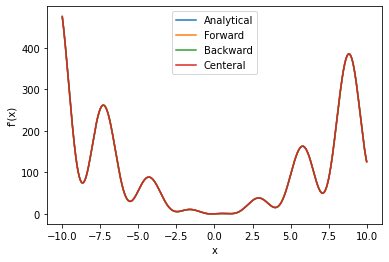

In [7]:
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x,analyticalDerivative,label='Analytical')
plt.plot(x,forwardDifference(x,h),label='Forward')
plt.plot(x,backwardDifference(x,h),label='Backward')
plt.plot(x,centeralDifference(x,h),label='Centeral')
plt.legend()

As seen They all give good approximations of the derivative, but they are not the same, so let's calculate the error in each of them, considering the analytical derivative as our reference.

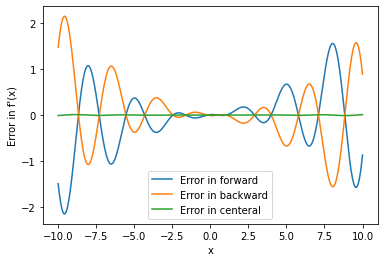

In [8]:
plt.xlabel('x')
plt.ylabel("Error in f'(x)")
plt.plot(x,forwardDifference(x,h)-analyticalDerivative,label='Error in forward')
plt.plot(x,backwardDifference(x,h)-analyticalDerivative,label='Error in backward')
plt.plot(x,centeralDifference(x,h)-analyticalDerivative,label='Error in centeral')
plt.legend()

As seen in the plot, the central difference is the most accurate with error of approximatiely zero

## 1.1 why is the central method more accurate

$\textbf{The forward difference}:$ $ f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h} + O(h)$
$\newline$ 
$\textbf{The backward difference}:$ $ f'(x) = \lim_{h\to 0} \frac{f(x)-f(x-h)}{h} + O(h) $
$\newline$ 
$\textbf{The central difference}:$ $ f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x-h)}{2h} +O(h^{2})$

where $O(h^{n})$ is the error proportional to $h^{n}$.
### but why is the order of the error in the central method differet?
using taylor series to expand the function at $x_{0}=h$ and at $x_{0}=-h$:
$$
f(x+h)= f(x) + f'(x)h+\frac{1}{2}f''(x)h^{2}+\frac{1}{6}f'''(x)h^{3}+\dots
$$
$$
f(x-h)= f(x) - f'(x)h+\frac{1}{2}f''(x)h^{2}-\frac{1}{6}f'''(x)h^{3}+\dots
$$
$\textbf{now lets move f'(x) to the left hand side and see what it's equal to:}$
$$
f'(x)=\frac{1}{h} \left[f(x+h)-\left(f(x)+\frac{1}{2} f''(x)h^{2}+\frac{1}{6}h^{3}+\dots\right)\right] =\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6} f'''(x)h^{2}-\dots
$$
$$
f'(x)=\frac{1}{h} \left[-f(x-h)+\left(f(x)+\frac{1}{2} f''(x)h^{2}-\frac{1}{6}h^{3}\pm\dots\right)\right] =\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6} f'''(x)h^{2}\pm\dots
$$
It's clear from the above analysis that the forward and backward difference methods are affected by an error of $O(h)$ as $h$ term is present on the right hand side.

$$\because f(x+h)-f(x-h)= 2f'(x)h+\frac{1}{3}f'''(x)h^{3}+...$$
$$ f'(x)=\frac{f(x+h)-f(x-h)}{2h}-\frac{1}{6} f'''(x)h^{2}-\dots$$
It's clear now that the central difference method is affected by an error of $O(h^{2})$ as  $h$ term isn't present on the right hand side but $h^{2}$ is.

## 1.2 Higher Accuracy

### Richardson:
To reduce the error, the central method has taken into account the previous point (x-h,f(x-h)) and the next point (x+h,f(x+h)), so one idea to reduce the error even more is to take into account the point before and after the previous and next points respectively, and that's how the Richardson method works(in an intuitve way)

$$
f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right] +O(h^{4})
$$

In [9]:
def richardson(f,x,h):
    return 1/(12*h) *( f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))

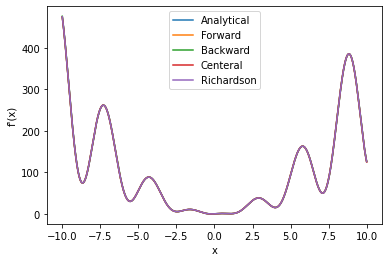

In [10]:
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x,analyticalDerivative,label='Analytical')
plt.plot(x,forwardDifference(x,h),label='Forward')
plt.plot(x,backwardDifference(x,h),label='Backward')
plt.plot(x,centeralDifference(x,h),label='Centeral')
plt.plot(x,richardson(f,x,h),label='Richardson')
plt.legend()

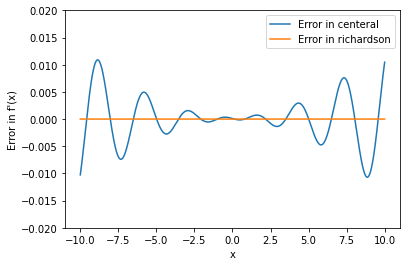

In [11]:
plt.xlabel('x')
plt.ylabel("Error in f'(x)")
plt.plot(x,centeralDifference(x,h)-analyticalDerivative,label='Error in centeral')
plt.plot(x,richardson(f,x,h)-analyticalDerivative,label='Error in richardson')
plt.ylim(-0.02,0.02)
#zooming in to see more clearly the difference between the centeral and richardson methods
plt.legend()

## 1.3 Even higher accuracy:

By taking into account more terms, the accuracy can be increased even further. This can be achieved using the iteration formula.
$$
D_{n+1}=\frac{2^{2n}D_{n}(h)-D_{n}(2h)}{2^{2n}-1}
$$
where $D_{1}$ is the richardson function that was written earlier.

In [12]:
def nRichardson(nmax,f,x,h):
    #nmax: the order of iteration for calculating the first derivative
    d1=np.array([richardson(f,x,h*2**j) for j in range(nmax)]) #remember that the function richardson returns an array, so this way d1 is an array of arrays.
    for n in range(1,nmax):
        d=np.array([(2**(2*n)*d1[j]-d1[j+1])/(2**(2*n)-1) for j in range(len(d1)-1)])
        d1=d
    return d1[0] #at the end of this process d1 is an array of arrays that has only one array as an element, and we want to return this array to plot it.

#Why is d1 initialized as an array of size nmax?
# for example to calculate the 4th iteration
    """
                                 D4
                   _______________|_______________
                 D3(h)                         D3(2h)
           ________|_______                 ______|_______
        D2(h)           D2(2h)           D2(2h)          D2(4h)
       ___|____        ____|____         ___|___        ____|____
    D1(h)   D1(2h)   D1(2h)  D1(4h)    D1(2h) D1(4h)  D1(4h)  D1(8h)
    """
#and that's why we always stop at h*2^(nmax-1).

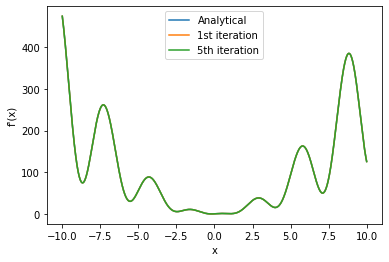

In [13]:
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x,analyticalDerivative,label='Analytical')
plt.plot(x,richardson(f,x,h),label='1st iteration')
plt.plot(x,nRichardson(5,f,x,h),label='5th iteration')
plt.legend()

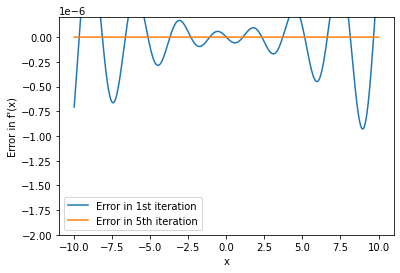

In [14]:
plt.xlabel('x')
plt.ylabel("Error in f'(x)")
plt.plot(x,richardson(f,x,h)-analyticalDerivative,label='Error in 1st iteration')
plt.plot(x,nRichardson(5,f,x,h)-analyticalDerivative,label='Error in 5th iteration')
plt.ylim(-0.000002,0.0000002)
#zooming in to see more clearly the difference between the 1st iteration and 5th iteraiton.
plt.legend()

# 2.Second derivative

By taking the derivative of f'(x):
$\newline$ 
$$ f''(x) = \lim_{h\to 0} \frac{f'(x+h)-f'(x)}{h}$$
$\newline$ 
$$ f''(x) = \lim_{h\to 0} \frac{f'(x)-f'(x-h)}{h}$$
$\newline$ 
$$ f''(x) = \lim_{h\to 0} \frac{f'(x+h)-f'(x-h)}{2h}$$

and since each $f'(x)$ can be calculated by different methods as dicussed earlier, therefore there are many possiblities for calcualting $f''(x)$ in terms of $f(x)$

$\textbf {Dobule forward (using forward method to calculate each f'(x)):}$
$$f''(x) = \lim_{h\to 0} \frac{f(x+2h)-2f(x+h)+ f(x)}{h^{2}}$$
$\newline$ 
$\textbf{Double backward:}$ $$ f'(x) = \lim_{h\to 0} \frac{f(x)-2f(x-h)+f(x-2h)}{h^{2}}$$
$\newline$
$\textbf{Forward and backward:}$ $$ f'(x) = \lim_{h\to 0} \frac{f(x+h)-2f(x)+f(x-h)}{h^{2}}$$
$\newline$
$\textbf{Double central (same as (3) for g=2h):}$ 
 $$f'(x) = \lim_{h\to 0} \frac{f(x+2h)-2f(x)+f(x-2h)}{4h^{2}} = f'(x) = \lim_{h\to 0} \frac{f(x+g)-2f(x)+f(x-g)}{g^{2}}$$

In [15]:
analyticalDerivative2=-4*x * np.sin(2*x)-4*x**2 * np.cos(2*x)-4*x *np.sin(2*x)+2*np.cos(2*x)+6*x
def doubleForward(x,h):
    return (f(x+2*h)-2*f(x+h)+f(x))/(h**2)
def doubleBackward(x,h):
    return (f(x)-2*f(x-h)+f(x-2*h))/(h**2)
def doubleCenteral(x,h):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

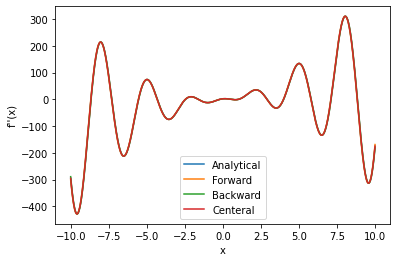

In [16]:
plt.xlabel('x')
plt.ylabel("f''(x)")
plt.plot(x,analyticalDerivative2,label='Analytical')
plt.plot(x,doubleForward(x,h),label='Forward')
plt.plot(x,doubleBackward(x,h),label='Backward')
plt.plot(x,doubleCenteral(x,h),label='Centeral')
plt.legend()

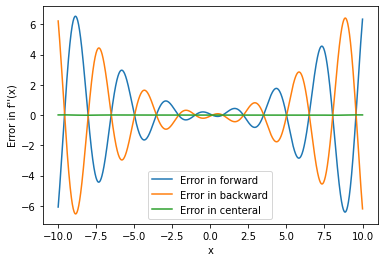

In [17]:
plt.xlabel('x')
plt.ylabel("Error in f''(x)")
plt.plot(x,doubleForward(x,h)-analyticalDerivative2,label='Error in forward')
plt.plot(x,doubleBackward(x,h)-analyticalDerivative2,label='Error in backward')
plt.plot(x,doubleCenteral(x,h)-analyticalDerivative2,label='Error in centeral')
plt.legend()

Same as we have seen with the first derivative.

## 2.1 Higher accuracy:
Richardson: $f''(x)=\frac{1}{12h^{2}}[-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)]+O(h^{4})$

In [18]:
def richardson2(f,x,h):
    return 1/(12*(h**2)) *( -f(x-2*h) +16*f(x-h)-30*f(x) + 16*f(x+h) - f(x+2*h))

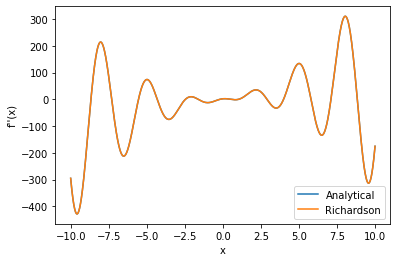

In [19]:
plt.xlabel('x')
plt.ylabel("f''(x)")
plt.plot(x,analyticalDerivative2,label='Analytical')
plt.plot(x,richardson2(f,x,h),label='Richardson')
plt.legend()

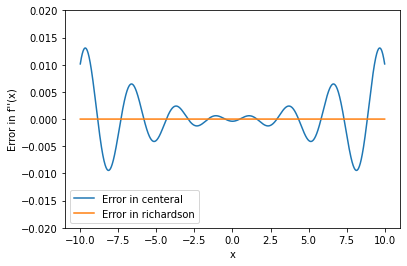

In [20]:
plt.xlabel('x')
plt.ylabel("Error in f''(x)")
plt.plot(x,doubleCenteral(x,h)-analyticalDerivative2,label='Error in centeral')
plt.plot(x,richardson2(f,x,h)-analyticalDerivative2,label='Error in richardson')
plt.ylim(-0.02,0.02)
#zooming in to see more clearly the difference between the centeral and richardson methods
plt.legend()